In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql import SQLContext

import missingno as msno

In [56]:
# create a SparkSession instance with the name moviedb with Hive support enabled
# https://spark.apache.org/docs/latest/sql-data-sources-hive-tables.html
# spark = SparkSession.builder.appName("moviedb").enableHiveSupport().getOrCreate()

# create a SparkContext instance which allows the Spark Application to access 
# Spark Cluster with the help of a resource manager which is usually YARN or Mesos
# sc = SparkSession.builder.getOrCreate()

# create a SQLContext instance to access the SQL query engine built on top of Spark
# sqlContext = SQLContext(spark)

## Read in data

In [57]:
file_path = "data/titanic/titanic_data.csv"

pdf = pd.read_csv(file_path)
# sdf = spark.read.csv(file_path, header=True)

In [58]:
pdf.head()
# sdf.show(5, truncate=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
pdf.describe()
# sdf.describe().show(truncate=False)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1314.000000,1314.000000,1314.000000,1050.000000,1314.000000,1314.000000,1313.000000
mean,653.958904,0.378234,2.296804,29.860638,0.499239,0.384323,33.223181
std,378.271519,0.485131,0.837182,14.391962,1.040131,0.864338,51.674830
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,327.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,653.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,981.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [60]:
pdf.info()
# sdf.printSchema()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1314 non-null   int64  
 1   Survived     1314 non-null   int64  
 2   Pclass       1314 non-null   int64  
 3   Name         1314 non-null   object 
 4   Sex          1314 non-null   object 
 5   Age          1050 non-null   float64
 6   SibSp        1314 non-null   int64  
 7   Parch        1314 non-null   int64  
 8   Ticket       1314 non-null   object 
 9   Fare         1313 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1312 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 123.3+ KB


<Axes: >

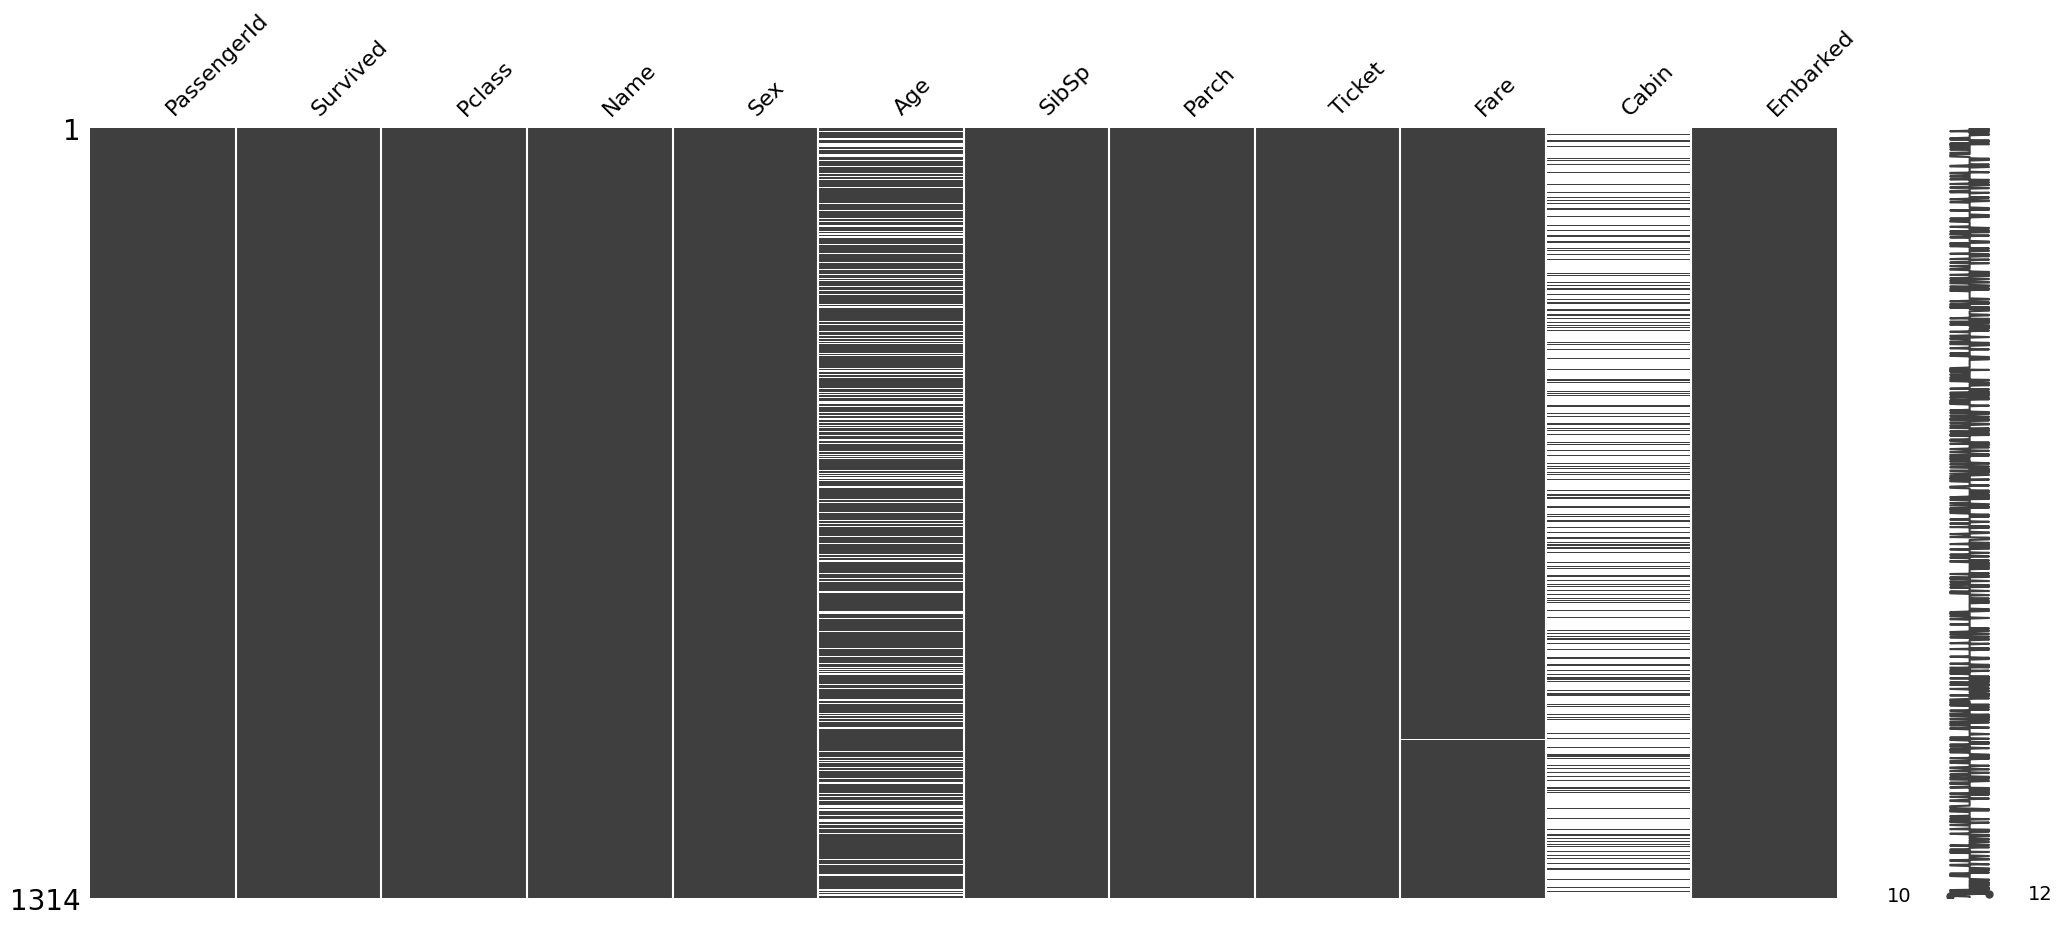

In [61]:
msno.matrix(pdf)

In [62]:
pdf.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             264
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1019
Embarked          2
dtype: int64

In [63]:
for c in pdf.columns:
    print(f"{c}: {len(pdf[c].unique())}")

PassengerId: 1309
Survived: 2
Pclass: 3
Name: 1307
Sex: 2
Age: 99
SibSp: 7
Parch: 8
Ticket: 929
Fare: 282
Cabin: 187
Embarked: 4


In [64]:
pdf["Sex"].unique()

array(['male', 'female'], dtype=object)

In [65]:
pdf.loc[pdf.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1309,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
1310,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
1311,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
1312,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
1313,990,1,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [66]:
pdf = pdf.drop_duplicates().reset_index(drop=True)

<Axes: >

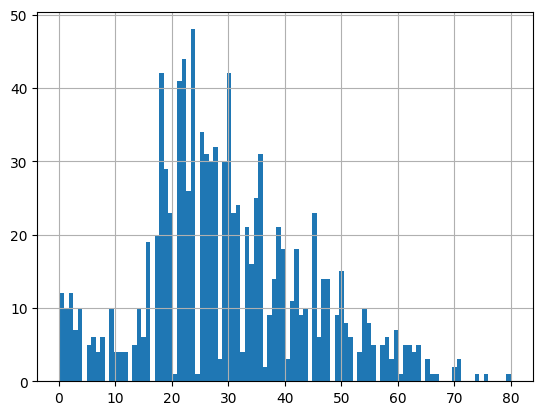

In [67]:
pdf["Age"].hist(bins=100)

<Axes: >

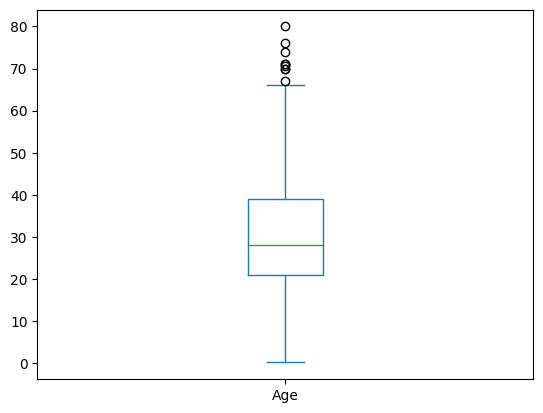

In [68]:
pdf["Age"].plot(kind="box")

In [69]:
pdf["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<Axes: xlabel='Embarked'>

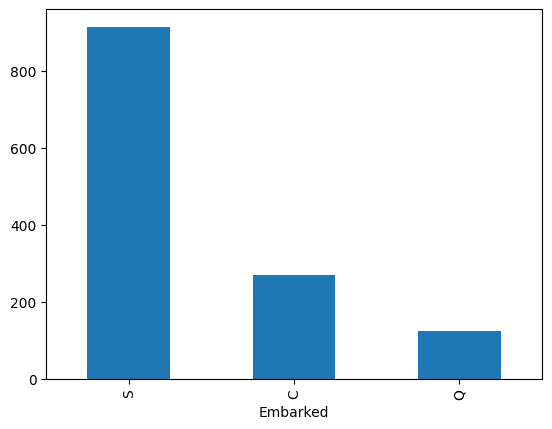

In [70]:
pdf["Embarked"].value_counts().plot(kind="bar")

<Axes: xlabel='Pclass'>

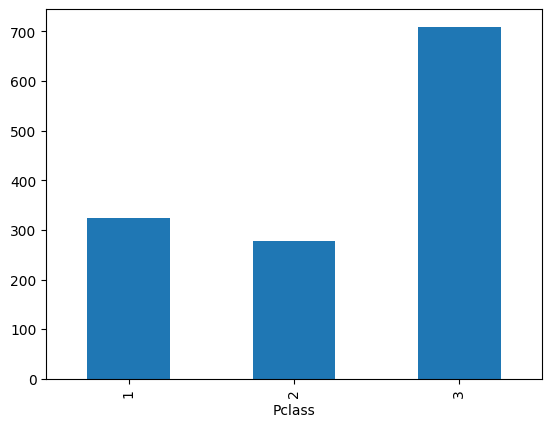

In [71]:
pdf["Pclass"].value_counts().sort_index().plot(kind="bar")

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

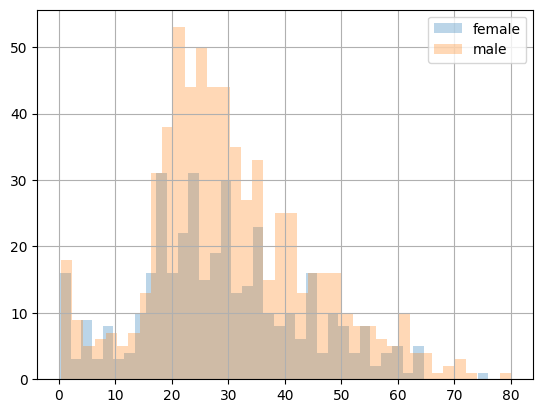

In [72]:
pdf.groupby("Sex")["Age"].hist(bins=40, alpha=0.3, legend=True)

In [73]:
pdf.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


<Axes: >

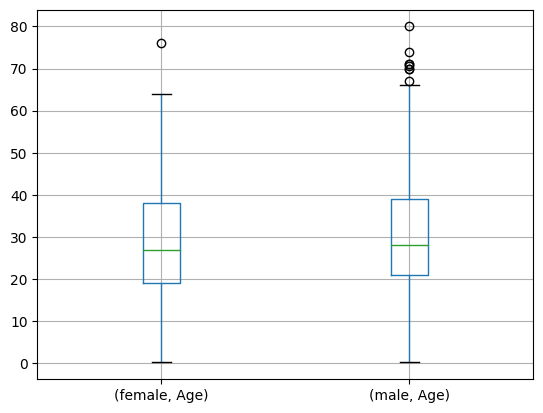

In [74]:
pdf[["Age", "Sex"]].groupby("Sex").boxplot(subplots=False)

<Axes: xlabel='Embarked'>

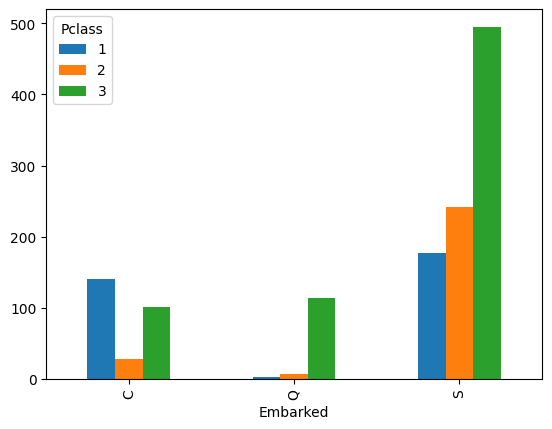

In [75]:
pdf.groupby("Pclass")["Embarked"].value_counts().unstack(level=0).plot(kind="bar")

<Axes: xlabel='Pclass'>

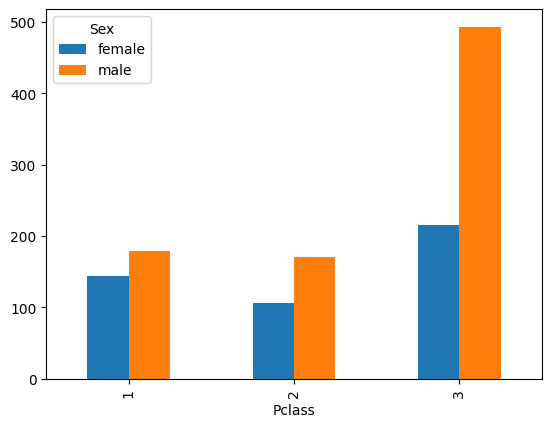

In [76]:
pdf.groupby("Sex")["Pclass"].value_counts().unstack(level=0).plot(kind="bar")

<Axes: xlabel='Sex', ylabel='Age'>

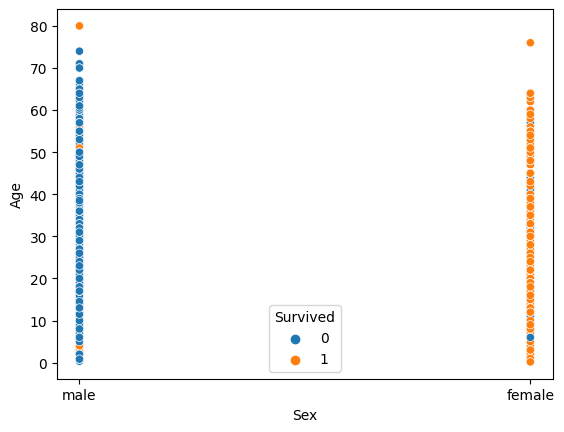

In [77]:
# plt.figure(figsize=(13,11))

sns.scatterplot(
    data=pdf, 
    x="Sex", 
    y="Age",
    hue="Survived",
)

# Retail data

In [78]:
tdf = pd.read_csv("data/Retail/retail_data.csv")
tdf["Date"] = pd.to_datetime(tdf["Date"])

In [79]:
tdf.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0


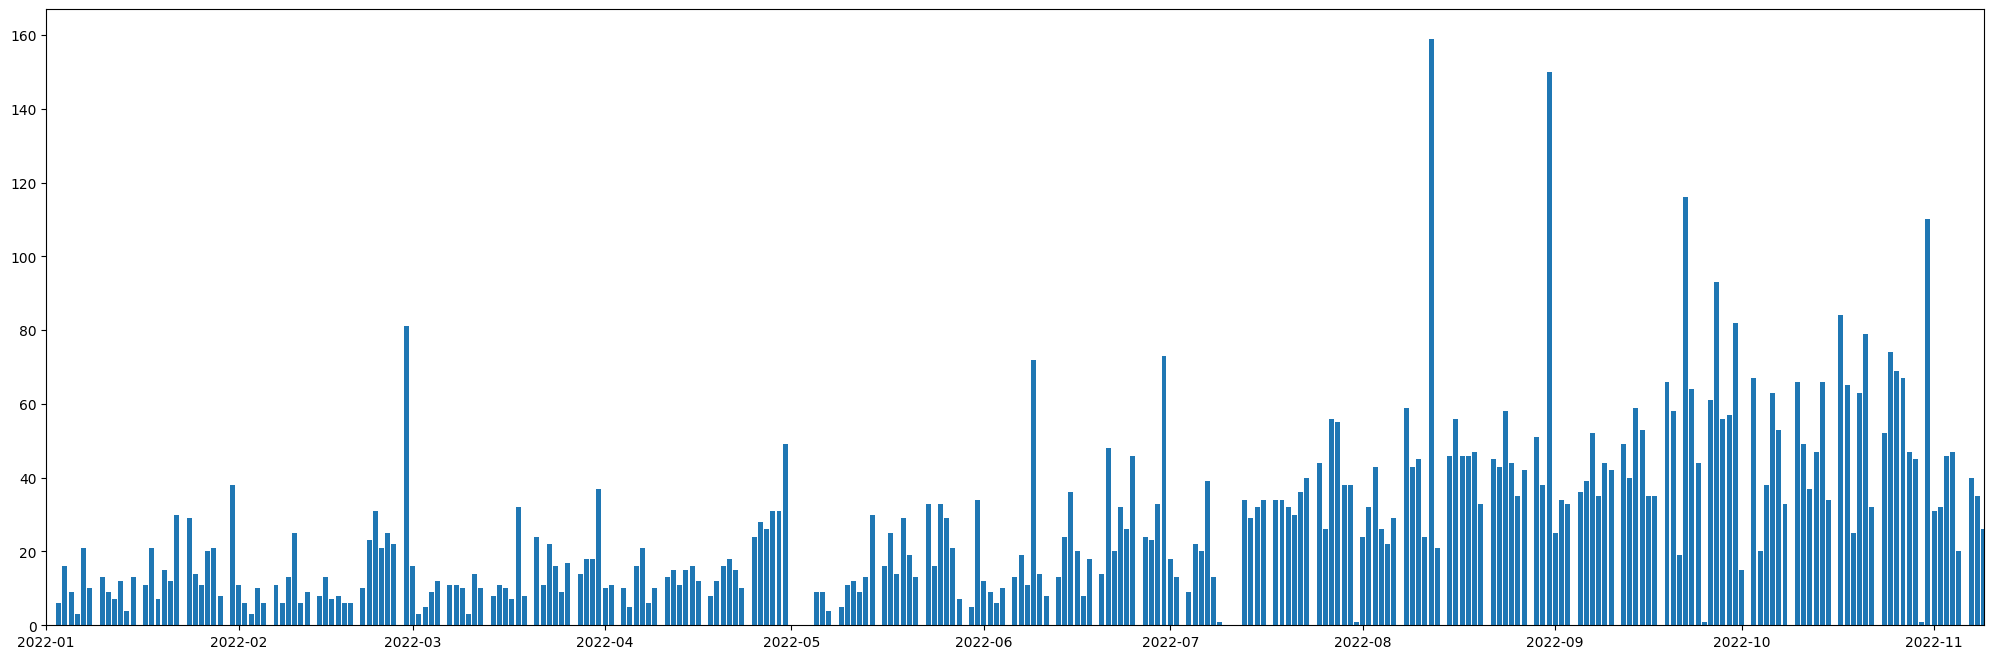

In [80]:
plt.figure(figsize=(25,8))
plt.bar(
    x=tdf["Date"][tdf["Date"]>"2022-01-01"].value_counts().sort_index().index,
    height=tdf["Date"][tdf["Date"]>"2022-01-01"].value_counts().sort_index().values
)
plt.xlim(
    pd.to_datetime("2022-01-01"),
    tdf["Date"].max()
)
plt.show()

In [81]:
tdf["weekday"] = tdf["Date"].dt.day_name()

<Axes: xlabel='weekday'>

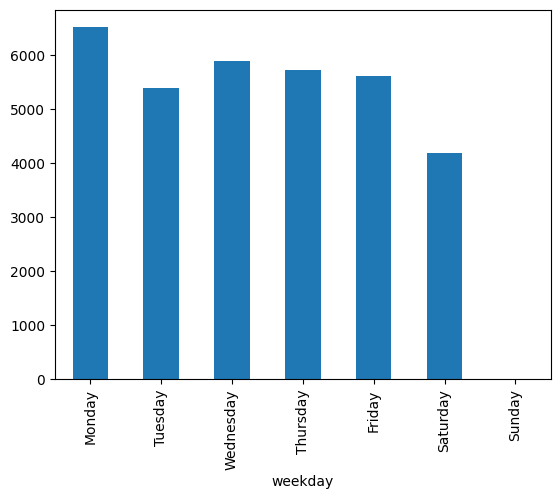

In [82]:
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdf["weekday"].value_counts().reindex(week_day_order).plot(kind="bar")

<Axes: xlabel='Date'>

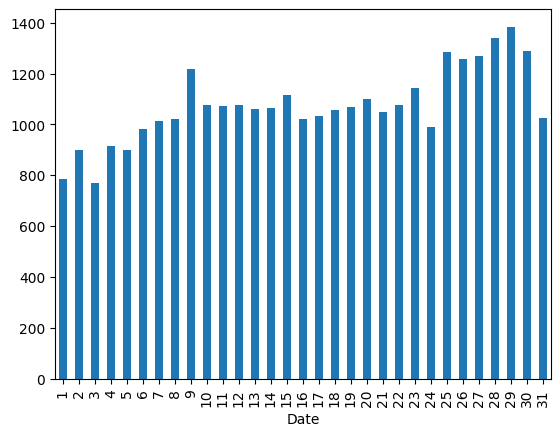

In [83]:
tdf["Date"].dt.day.value_counts().sort_index().plot(kind="bar")

# House Sale Data

In [84]:
house_df = pd.read_csv("data/house-prices-advanced-regression-techniques/house_data.csv")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

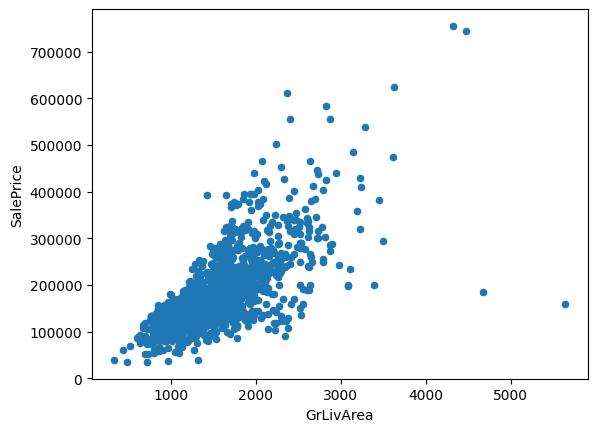

In [85]:
house_df.plot(kind="scatter", x="GrLivArea", y="SalePrice")

In [86]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [87]:
df_num = house_df.select_dtypes(include = ['float64', 'int64'])

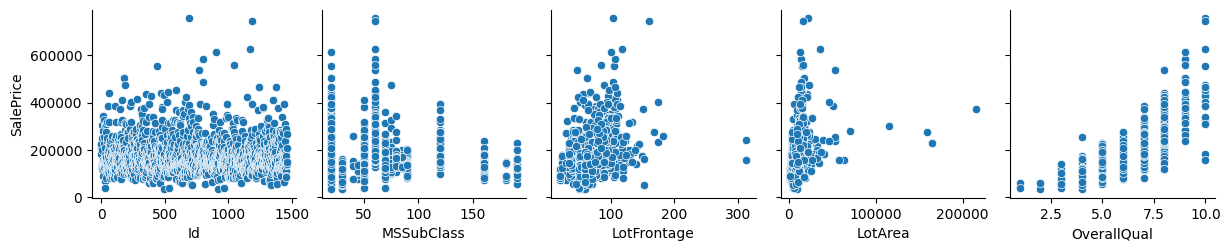

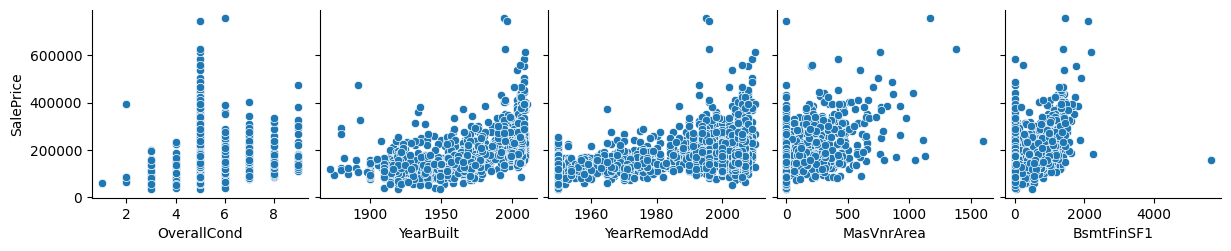

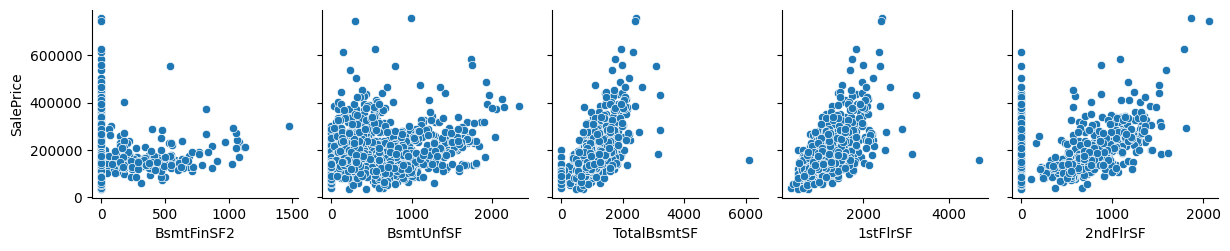

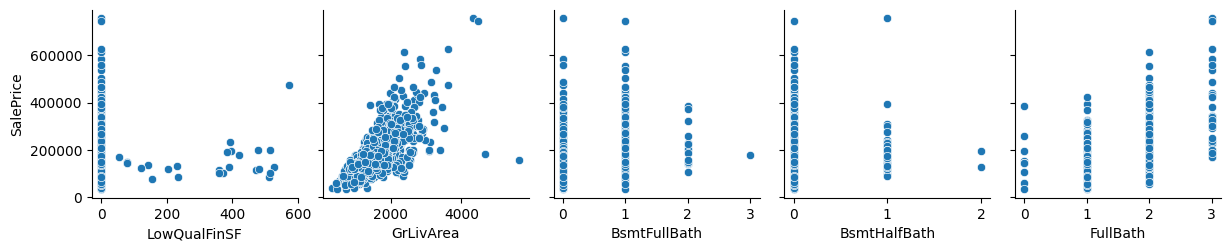

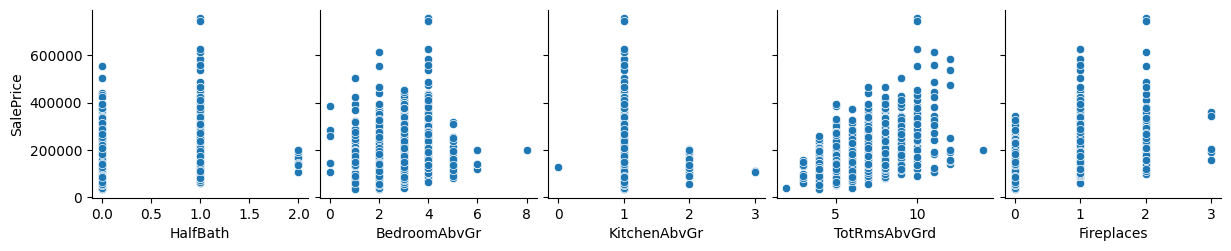

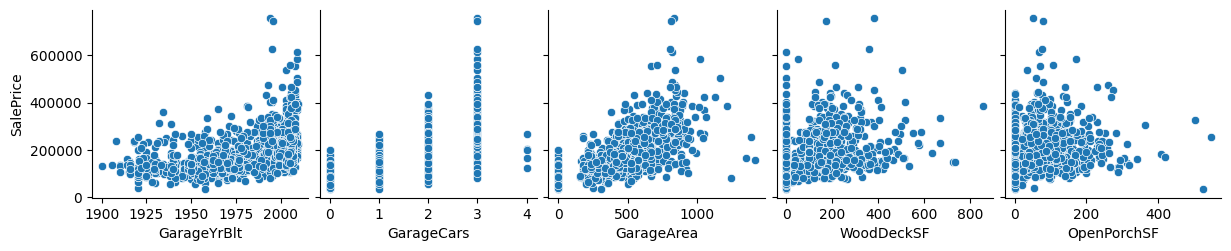

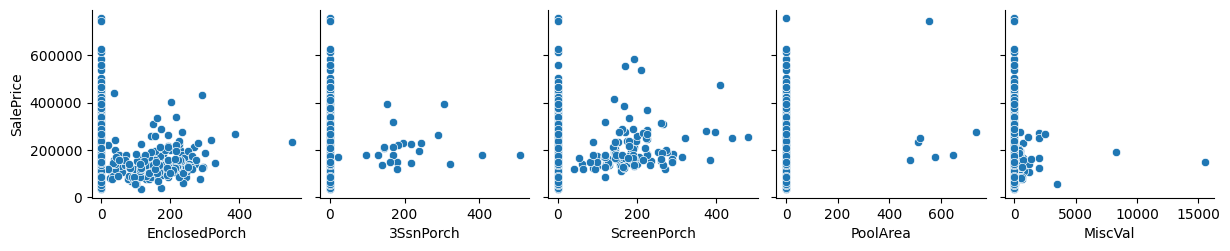

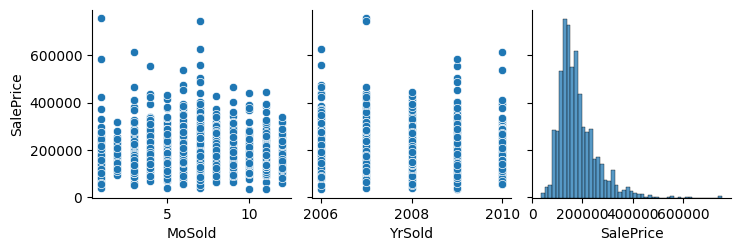

In [88]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

<Axes: >

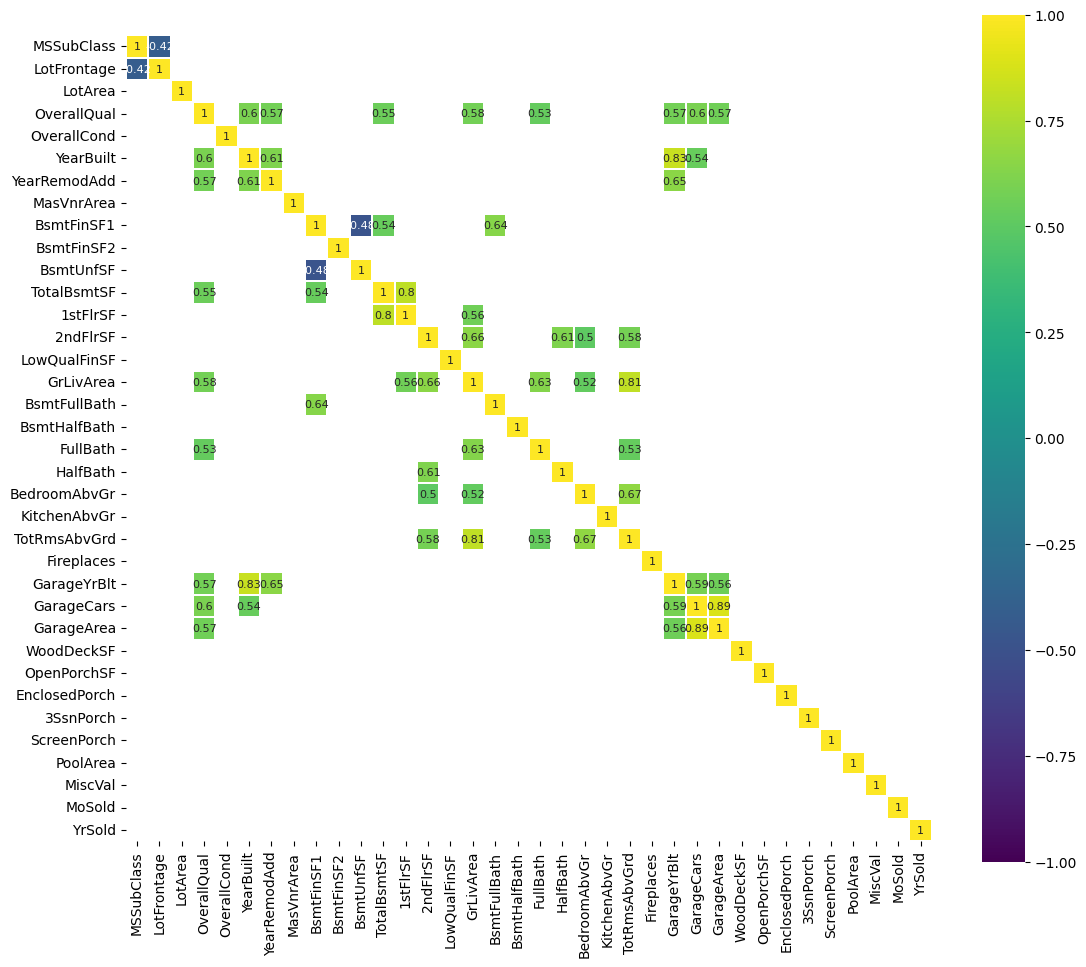

In [89]:
plt.figure(figsize=(13,11))

corr = df_num.drop(['SalePrice', 'Id'], axis=1).corr()
sns.heatmap(
    corr[(corr >= 0.5) | (corr <= -0.4)],
    cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
    annot=True, annot_kws={"size": 8}, square=True
)

<Axes: >

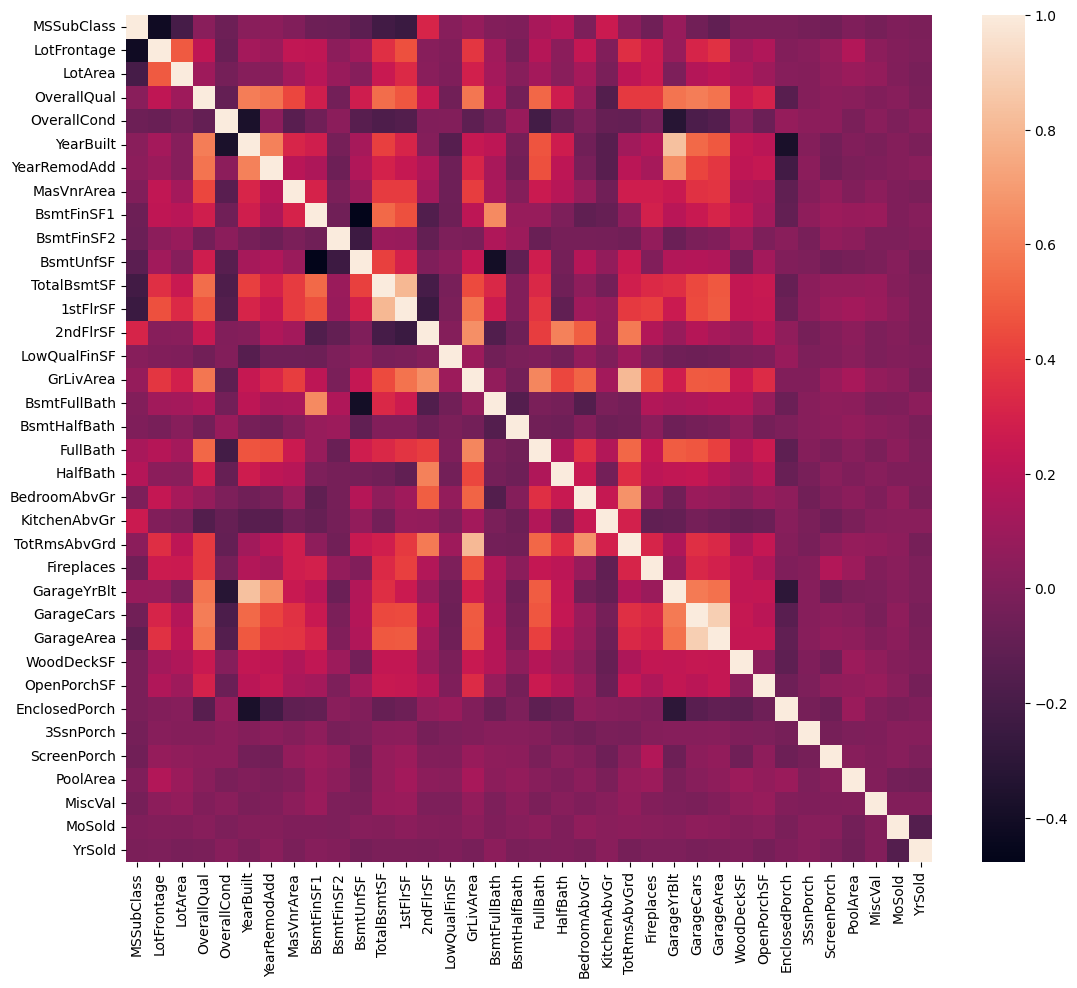

In [90]:
plt.figure(figsize=(13,11))
sns.heatmap(corr)

<Axes: xlabel='YearBuilt', ylabel='GrLivArea'>

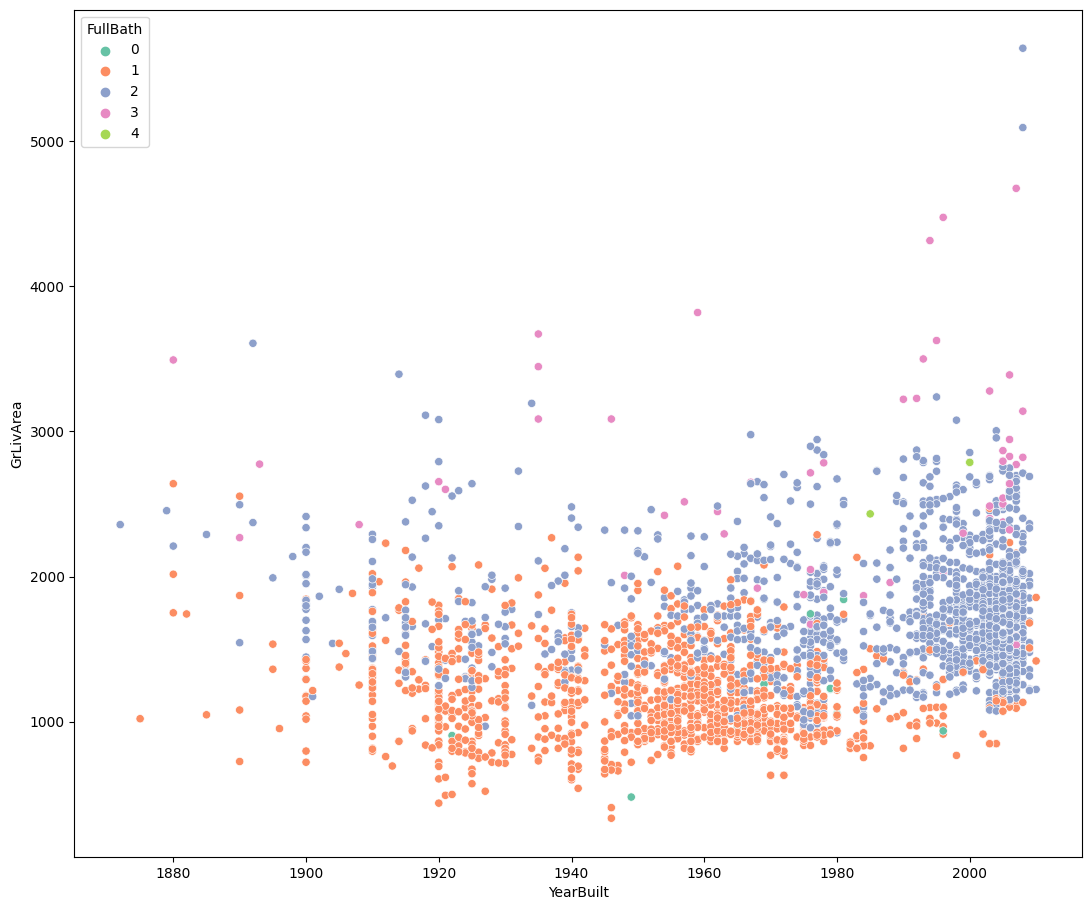

In [91]:
plt.figure(figsize=(13,11))

sns.scatterplot(
    data=df_num, 
    y="GrLivArea", 
    x="YearBuilt",
    hue="FullBath",
    palette="Set2"
)

In [92]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf